In [1]:
#!pip install pandas plotnine
# use any plotting library seaborn matplotlib,..........

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm

from sklearn.preprocessing import StandardScaler
from plotnine import *
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn import datasets

from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import NearestNeighbors

dataset1


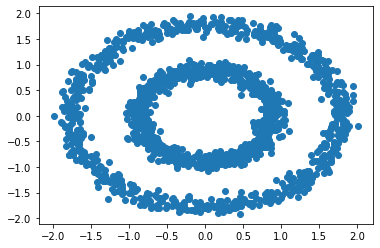

dataset2


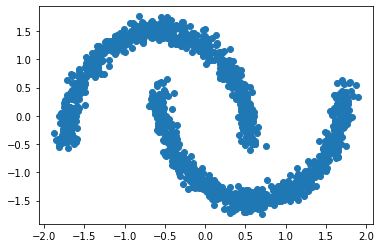

dataset3


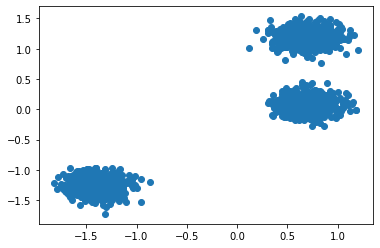

dataset4


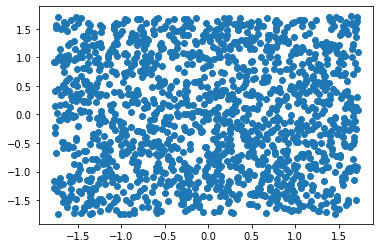

dataset5


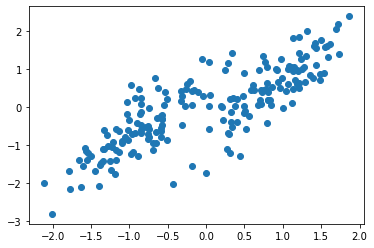

dataset6


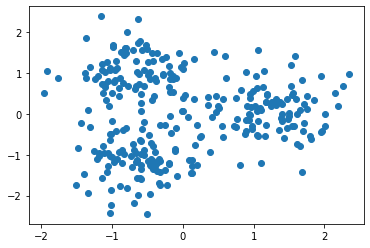

dataset7


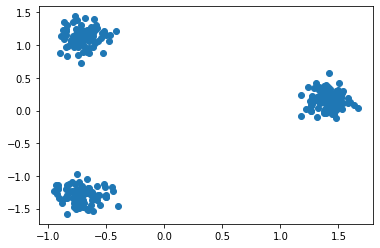

dataset8


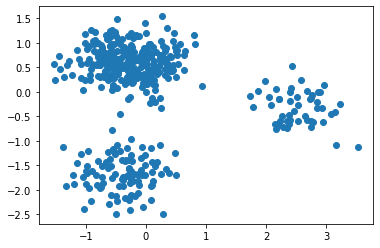

dataset9


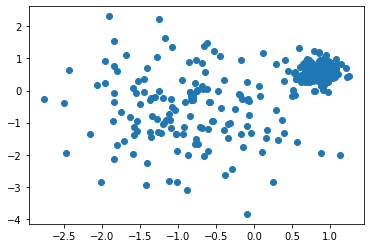

In [2]:
n_samples = 1500

dataset1 = sklearn.datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
dataset1=pd.DataFrame(dataset1[0])

dataset2 = sklearn.datasets.make_moons(n_samples=n_samples, noise=.05)
dataset2=pd.DataFrame(dataset2[0])

dataset3 = sklearn.datasets.make_blobs(n_samples=n_samples, random_state=8)
dataset3=pd.DataFrame(dataset3[0])

dataset4= np.random.rand(n_samples, 2), None
dataset4=pd.DataFrame(dataset4[0])

dataset5= pd.read_csv("data/dataset5.csv", header=None)

dataset6= pd.read_csv("data/dataset6.csv", header=None)

dataset7= pd.read_csv("data/dataset7.csv", header=None)
dataset8= pd.read_csv("data/dataset8.csv")
dataset9= pd.read_csv("data/dataset9.csv")

z = StandardScaler()

for i in range(1,8):
    z = StandardScaler()
    exec(f'dataset{i}[["x","y"]] = z.fit_transform(dataset{i})')
    print(f'dataset{i}')
    exec(f'plt.scatter(data = dataset{i},x="x",y="y")');
    plt.show()
    
#     exec(f'(ggplot(, aes(x = "x", y = "y")) + geom_point()+ggtitle("dataset{i}")).draw()');
# ggplot(dataset6, aes(x = "x", y = "y")) + geom_point() 
i = 8
print(f'dataset{i}')
exec(f'plt.scatter(data = dataset{i},x="x",y="y");');
plt.show()

i = 9
print(f'dataset{i}')
exec(f'plt.scatter(data = dataset{i},x="x",y="y");');
plt.show()


In [3]:
for dataset in [dataset1,dataset2,dataset3,dataset4,dataset5,dataset6,dataset7,dataset8,dataset9]:
    print(dataset.columns)

Index([0, 1, 'x', 'y'], dtype='object')
Index([0, 1, 'x', 'y'], dtype='object')
Index([0, 1, 'x', 'y'], dtype='object')
Index([0, 1, 'x', 'y'], dtype='object')
Index([0, 1, 'x', 'y'], dtype='object')
Index([0, 1, 'x', 'y'], dtype='object')
Index([0, 1, 'x', 'y'], dtype='object')
Index(['x', 'y'], dtype='object')
Index(['x', 'y'], dtype='object')


1- plot all dataset<br>
2- use standard scalar<br>
3- use K-means,GaussianMixture, dbscan<br>
4- plot dataset after clustering<br>
5- Evaluate inertia,silhouette score<br>

In [68]:
#K-means,GaussianMixture, dbscan
def all3(dataset,n_clusters = 3,eps = 0.3,min_samples=10):
#     print("Normal dataset")
    fig, axs = plt.subplots(figsize=(15,10),nrows=2,ncols=2)
    sns.scatterplot(dataset.x, dataset.y, s=50,ax = axs[0][0]).set_title(f"original points")
    
#     print("KMeans")
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(dataset)
    kmeans_labels = kmeans.labels_
    sns.scatterplot(dataset.x, dataset.y, c=kmeans.labels_, s=50,ax = axs[1][0])\
    .set_title(f'KMeans silhouette_score: {silhouette_score(dataset, kmeans_labels)}')
    
# #     plt.title()
#     plt.show()
    
#     print("GaussianMixture")
    gmm = GaussianMixture(n_components = n_clusters).fit(dataset)
    gmm_labels = gmm.predict(dataset)
    sns.scatterplot(dataset.x, dataset.y, c=gmm_labels, s=50,ax = axs[1][1])\
    .set_title(f'GaussianMixture silhouette_score: {silhouette_score(dataset, gmm_labels)}')
#     plt.show()

#     print("DBSCAN")
    dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(dataset)
    clustering_labels = dbscan.fit_predict(dataset)
    sns.scatterplot(dataset.x, dataset.y, c=dbscan.labels_, s=50,ax = axs[0][1])\
    .set_title(f'DBSCAN silhouette_score: {silhouette_score(dataset, clustering_labels)}')
#     plt.show()
    
def onlyKmeans(dataset,n_clusters = 3):
    print("KMeans")
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(dataset)
    sns.scatterplot(dataset.x, dataset.y, c=kmeans.labels_, s=50)
    kmeans_labels = kmeans.labels_
    plt.title(f'silhouette_score: {silhouette_score(dataset, kmeans_labels)}')
    plt.show()
    
def onlyGMM(dataset,n_clusters = 3):
    print("GaussianMixture")
    gmm = GaussianMixture(n_components = n_clusters).fit(dataset)
    gmm_labels = gmm.predict(dataset)
    sns.scatterplot(dataset.x, dataset.y, c=gmm_labels, s=50) 
    plt.title(f'silhouette_score: {silhouette_score(dataset, gmm_labels)}')
    plt.show()

def onlyDBSCAN(dataset,eps = 0.3,min_samples=10):
    print("GaussianMixture")
    gmm = GaussianMixture(n_components = n_clusters).fit(dataset)
    gmm_labels = gmm.predict(dataset)
    sns.scatterplot(dataset.x, dataset.y, c=gmm_labels, s=50) 
    plt.title(f'silhouette_score: {silhouette_score(dataset, gmm_labels)}')
    plt.show()

for DataSet1

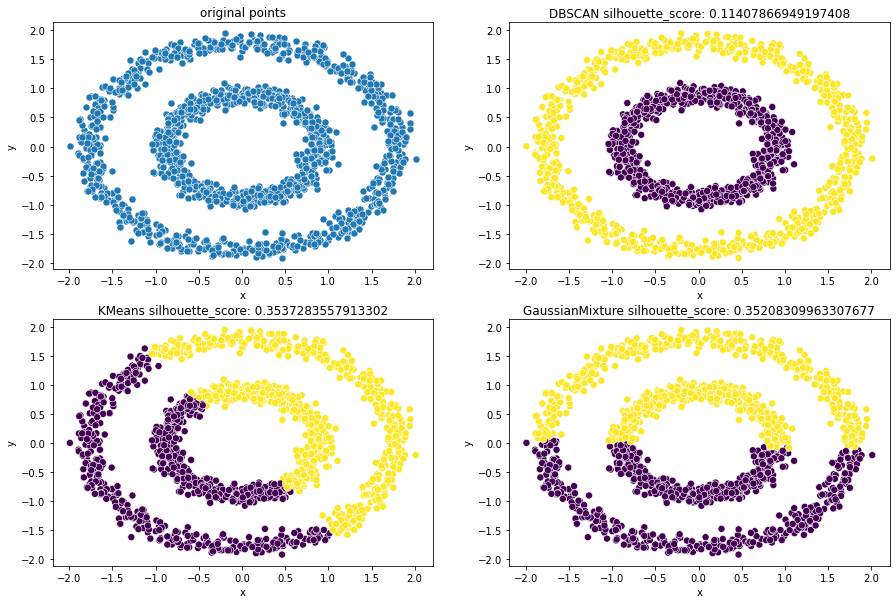

In [69]:
all3(dataset1,2)

KMeans


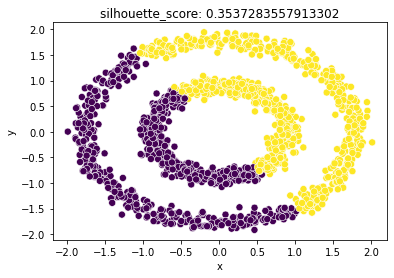

KMeans


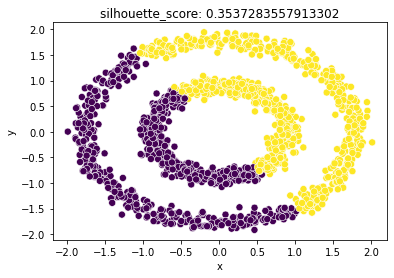

KMeans


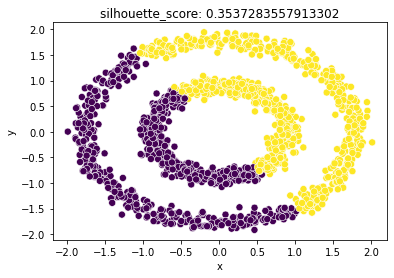

In [70]:
onlyKmeans(dataset1,2)
onlyKmeans(dataset1,2)
onlyKmeans(dataset1,2)

GaussianMixture


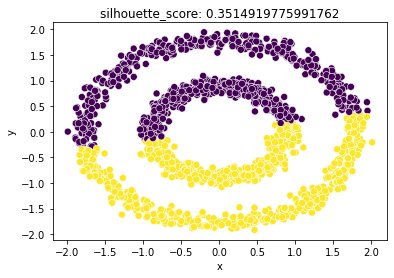

GaussianMixture


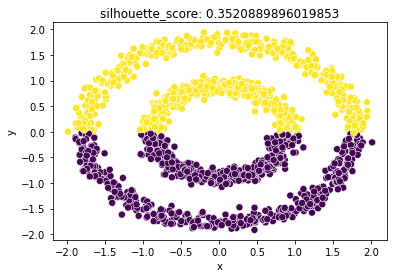

GaussianMixture


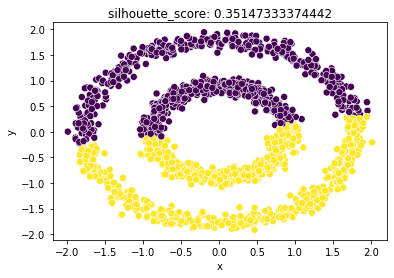

GaussianMixture


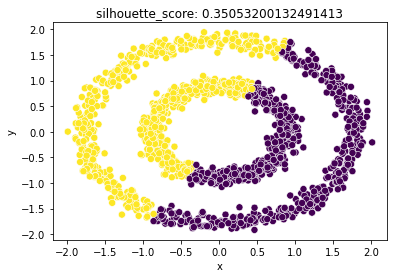

In [71]:
onlyGMM(dataset1,2)
onlyGMM(dataset1,2)
onlyGMM(dataset1,2)
onlyGMM(dataset1,2)

For dataset1 it appears that the DBscan only one that get a clear view where GMM and Kmeans Fail to do So not only that it apearse that the final results changes with the start (random) where kmeans not totaly random it has some seed built in it 
<a id='dataset1'></a>

For DataSet2

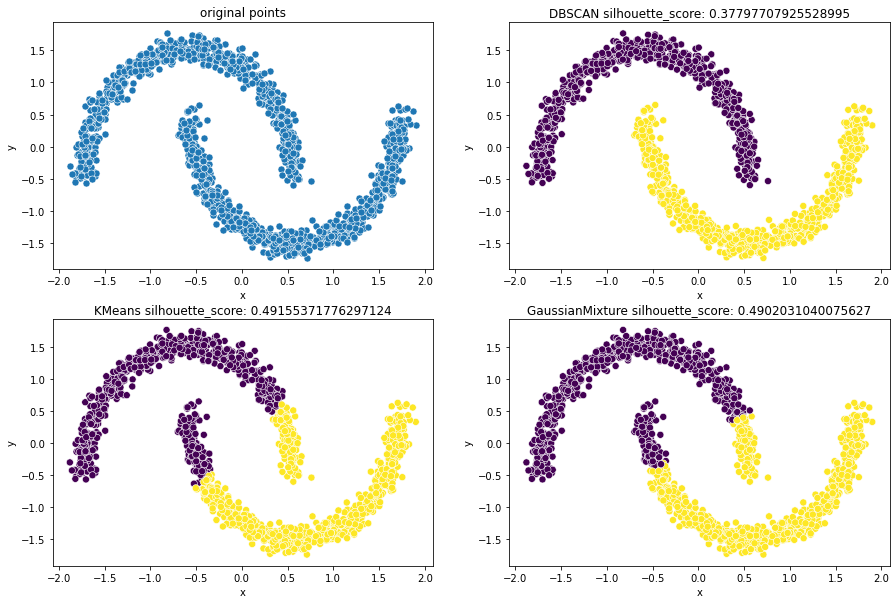

In [72]:
all3(dataset2,2)

GaussianMixture


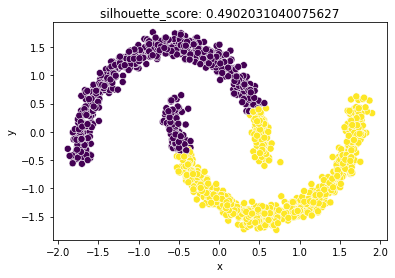

GaussianMixture


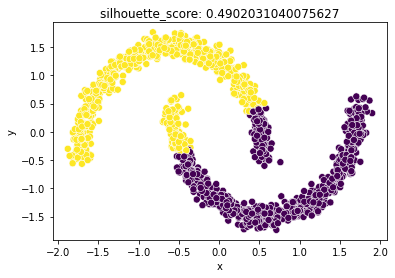

GaussianMixture


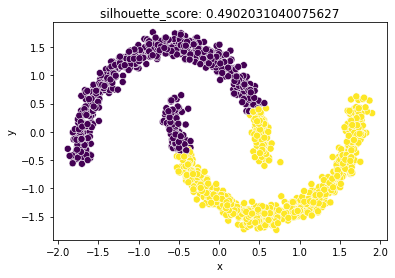

GaussianMixture


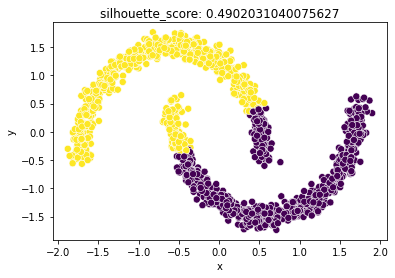

In [73]:
onlyGMM(dataset2,2)
onlyGMM(dataset2,2)
onlyGMM(dataset2,2)
onlyGMM(dataset2,2)

for data set 2 it appears that DBscan can cleary get best results with nearly each esp and min samlpe up to 15 also but the other algorihms fail to get it right and as the last one the GMM sounds not having clear start or seed
<a id='dataset2'></a>

for dataset 3 

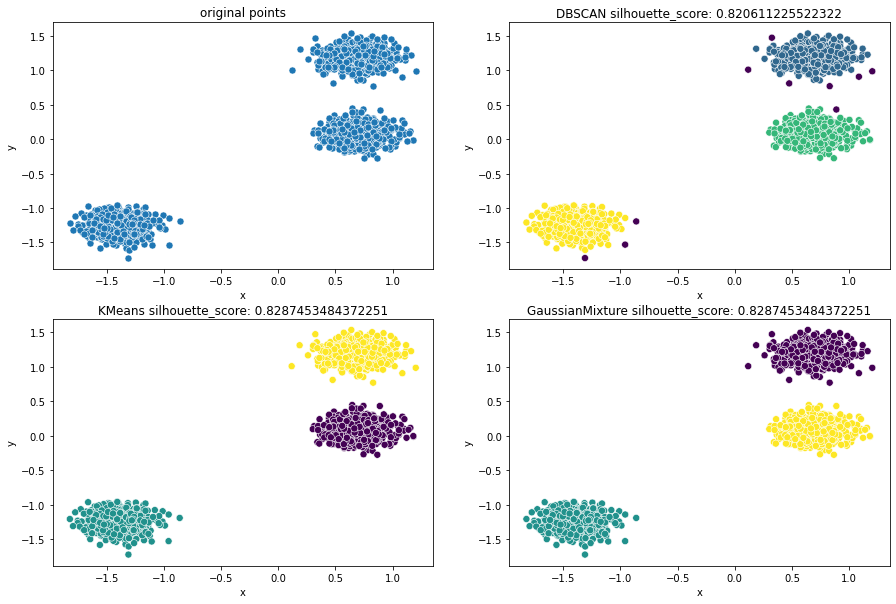

In [74]:
all3(dataset3,3,0.9,15)

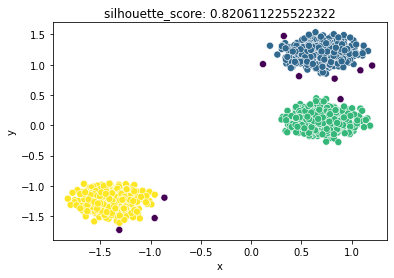

In [14]:
dataset = dataset3
eps =.9
min_samples = 15
dbscan = DBSCAN(eps=eps, min_samples=min_samples, ).fit(dataset)
clustering_labels = dbscan.fit_predict(dataset)
sns.scatterplot(dataset.x, dataset.y, c=dbscan.labels_, s=50) 
plt.title(f'silhouette_score: {silhouette_score(dataset, clustering_labels)}')
plt.show()

after some test to get the best vars for the DBscan i got eps = .9 and min sample = 15 reducuin them make the data cant cluster and it reades alot of them as noise in the edges of the data 
but our new model got it right from the first time like kmeans
<a id='dataset3'></a>


for dataset4

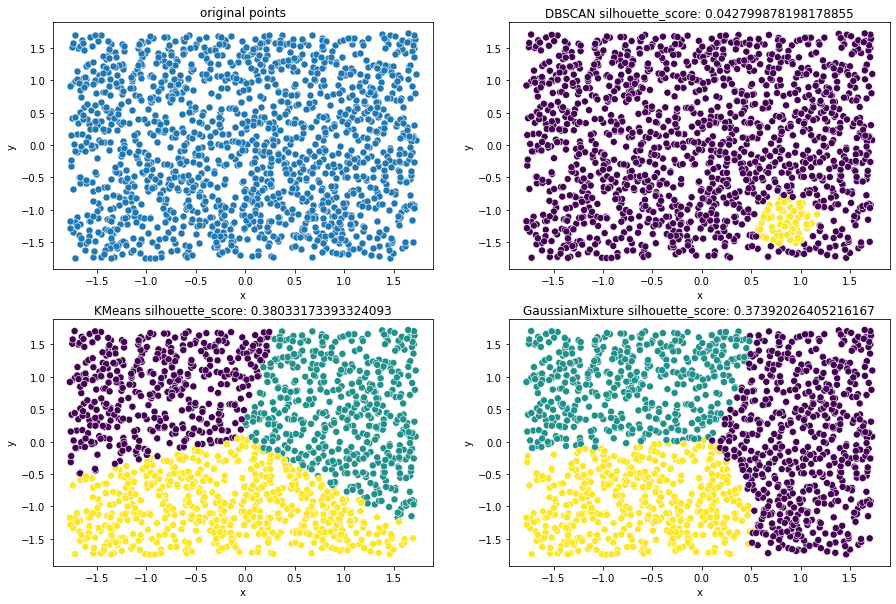

In [75]:
all3(dataset4,n_clusters = 3,eps = 0.3,min_samples=50)

there no algorithms that can help me with that data i can even get it right 

<a id='dataset4'></a>

for dataset5

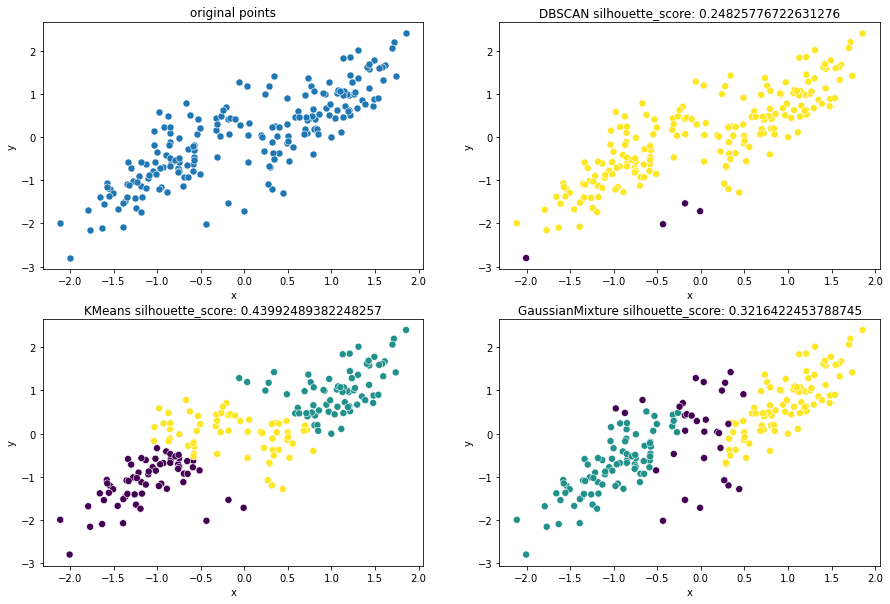

In [76]:
all3(dataset5,n_clusters = 3,eps = 0.9,min_samples=8)

i can see with my eyes 3 cluster and the KMeans and GMM got it right with no effort what so ever yet the DBSCAN cant get it right with all values u tried, and i see that GMM model appears to less accurate in the silhoutte score
<a id='dataset5'></a>

for dataset6

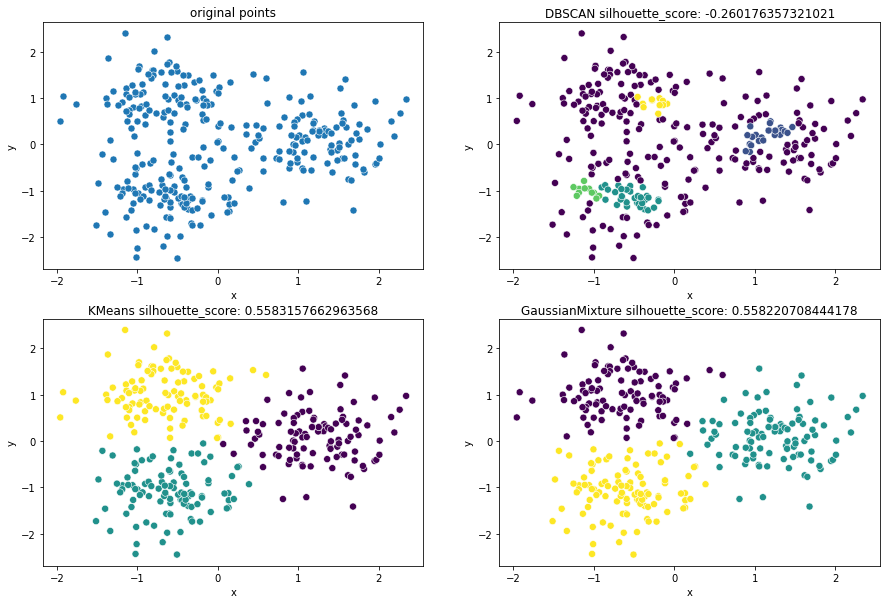

In [77]:
all3(dataset6,n_clusters = 3,eps = 0.3,min_samples=10)

i can see with my eyes 3 cluster and the KMeans and GMM got it right with no effort  what so ever with the same score, yet the DBSCAN cant get it right with all values u tried like data set 7 that appeas that the reason why is the data is more seperated than it's needed and that make the model fail but eps with .5 and 10 samples got okesh values
<a id='dataset6'></a>

for dataset7

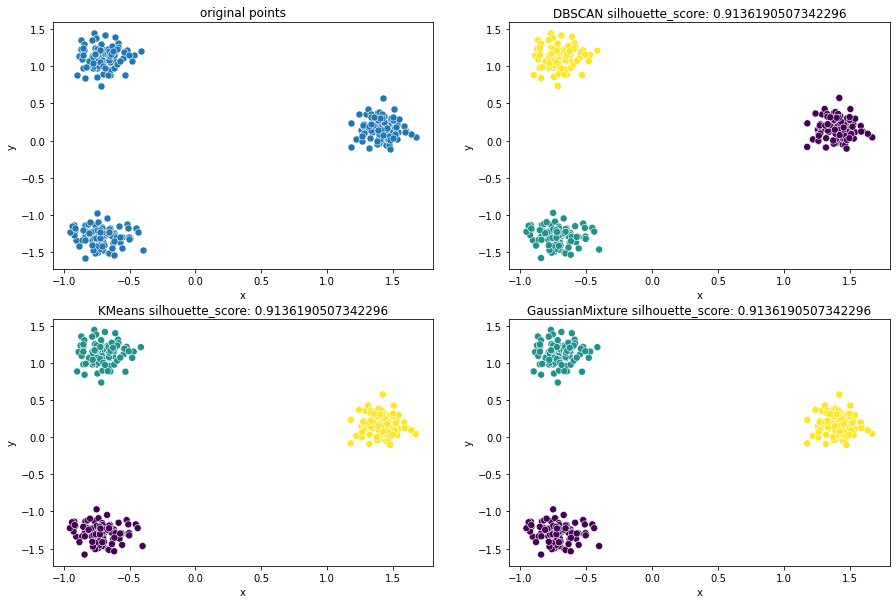

In [78]:
all3(dataset7,n_clusters = 3,eps = 0.3,min_samples=10)

it was easy for the 3 models to get it right with basic values as there is nearly no noise here 

<a id='dataset7'></a>

for dataset8

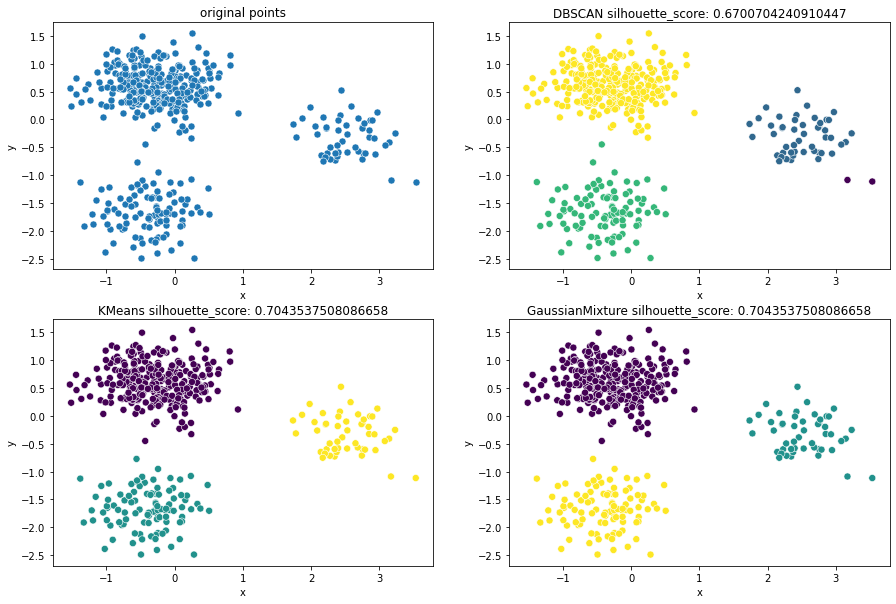

In [79]:
all3(dataset,n_clusters = 3,eps = 0.5,min_samples=10)

for it's seperated agaian i hade to do more work for the DBscan to work and no work needed for the K means and GMM but all got it right 

<a id='dataset8'></a>

for dataset9

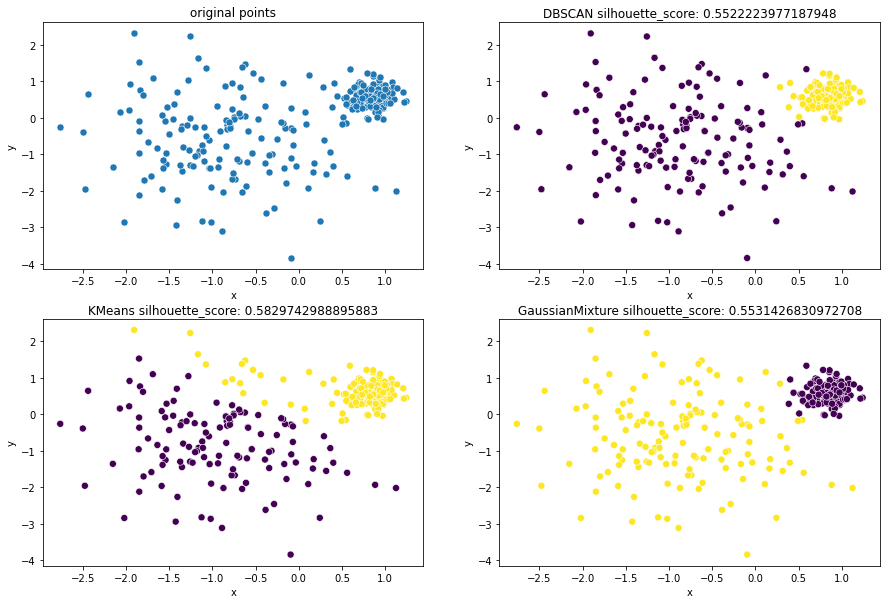

In [80]:
all3(dataset9,n_clusters = 2,eps = 0.3,min_samples=15)

i see that all data are noise and the cluster should be one so i gave the models 2 clusters and gave the DBscan some small eps with some big n
i see that the GMM got the most right here even if the score sayes otherwise 
<a id='dataset9'></a>